# Welcome to the AutoComet Notebook 

To run the code below:
1. Click on the cell to select it
2. Press SHIFT+ENTER on your keyboard or press Run button in the toolbar above

In [1]:
#import libraries 
import import_ipynb
import AutoComet_Functions as ac
import importlib
importlib.reload(ac)
import os, glob, cv2
import numpy as np
from skimage import exposure,io, measure
from skimage.measure import label, regionprops
from skimage.morphology import binary_erosion, binary_dilation, disk, remove_small_objects
from skimage.util import montage
import math
import shutil
import pandas as pd
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image

importing Jupyter notebook from AutoComet_Functions.ipynb
importing Jupyter notebook from AutoComet_Functions.ipynb


# Input Parameters and preprocessing

In [2]:
#input and output paths
input_path = "/Users/slam/Desktop/Example Dataset"
output_path="/Users/slam/Desktop/Example Output"

#flip image so that comets appear from top to bottom if necessary
image_fipping = False

#rotate images to different degrees if necessary
image_rotation = 0

#number of images to preview
preview_images = 10

#image file extension
image_extension = 'tif'

#crop size
crop_dim = (273, 100)

Review input images

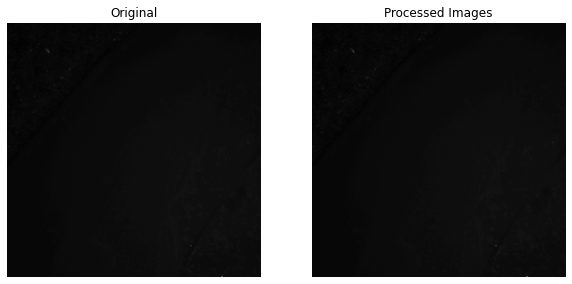

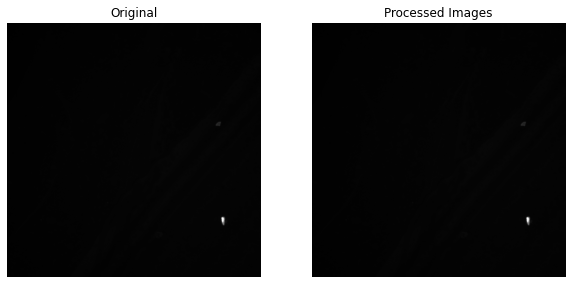

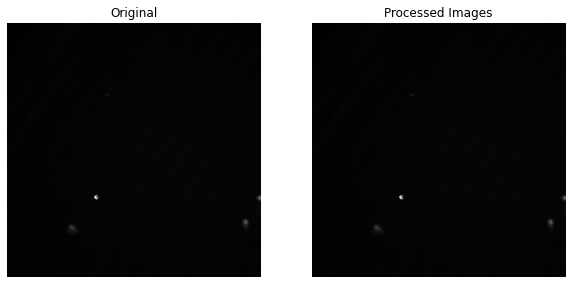

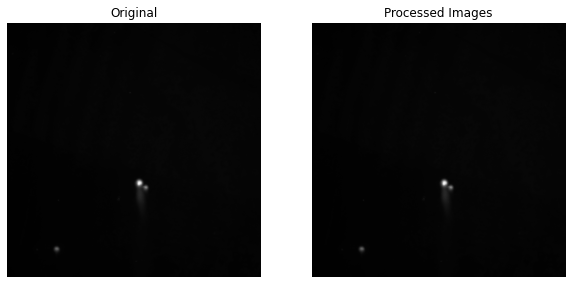

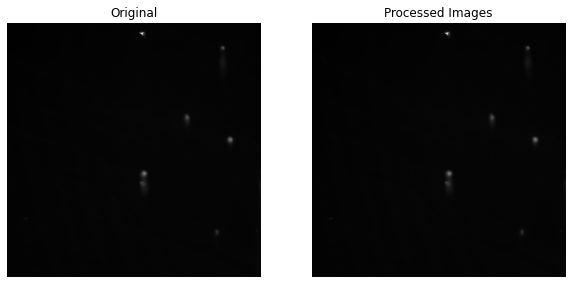

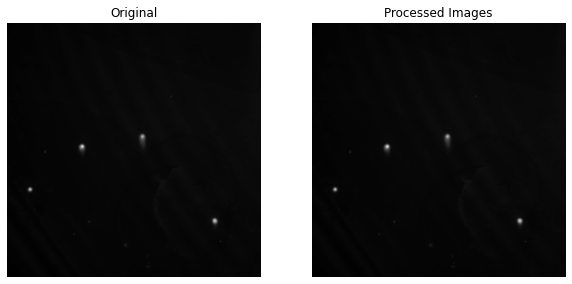

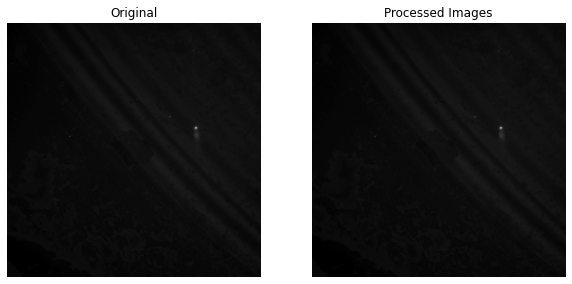

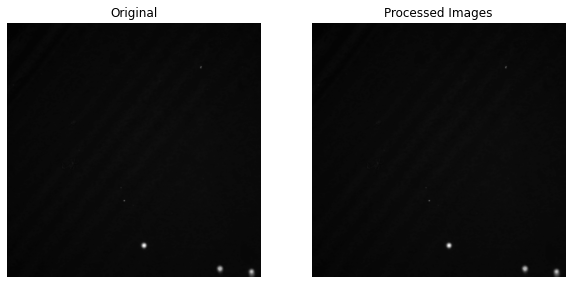

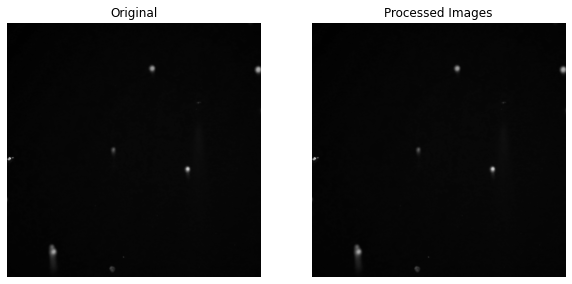

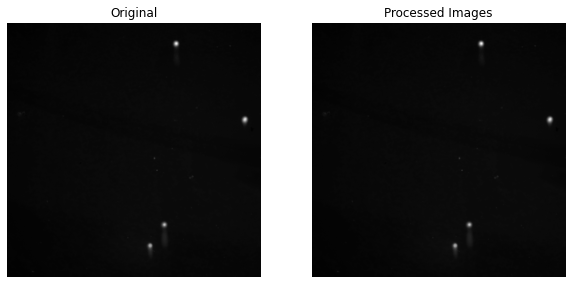

In [3]:
#read in files, set verbose = True to see filelist
img_filelist = ac.read_files(input_path, image_extension, verbose=False)

#preview images to see if preprocessing is needed
ac.image_preview(img_filelist, image_rotation, image_fipping, num_images=preview_images)

## comet segmentation and filtering
perform otsu segmentation on whole image to find comets

Aim: make sure comet heads are captured under `Filtered Labels` by changing:
- `min_area`: object larger than minimum area specified are included in Filtered Labels
- `max_area`: object smaller than maximum area specified are included in Filtered Labels


- gray rectangular box = filtered crops in dimension specified by `crop_dim`
- red rectangular box = kept crops in dimension specified by `crop_dim`

Images that have overall low intensity are filtered

Image montage path: /Users/slam/Desktop/Example Dataset/AutoComet-Example_1_MMStack_14-Pos000_000.ome.tif


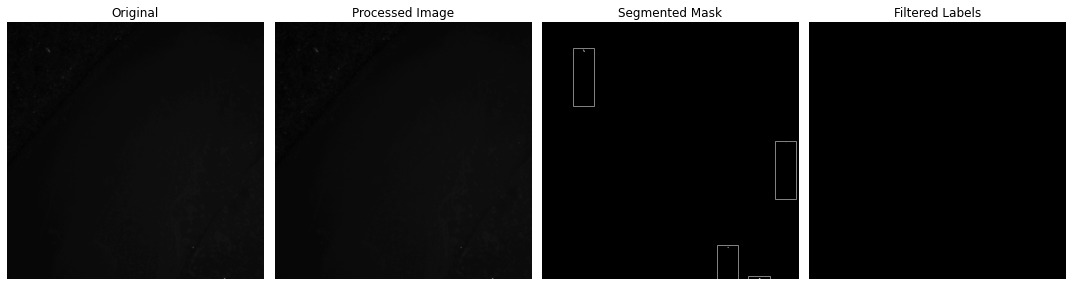

Image montage path: /Users/slam/Desktop/Example Dataset/AutoComet-Example_1_MMStack_14-Pos000_001.ome.tif


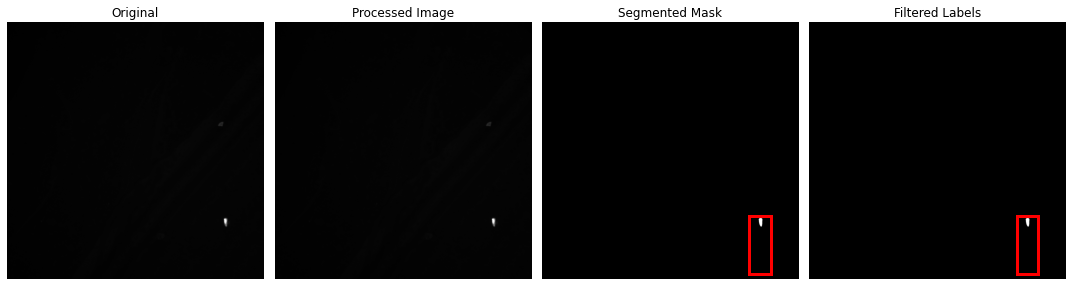

Image montage path: /Users/slam/Desktop/Example Dataset/AutoComet-Example_1_MMStack_14-Pos000_002.ome.tif


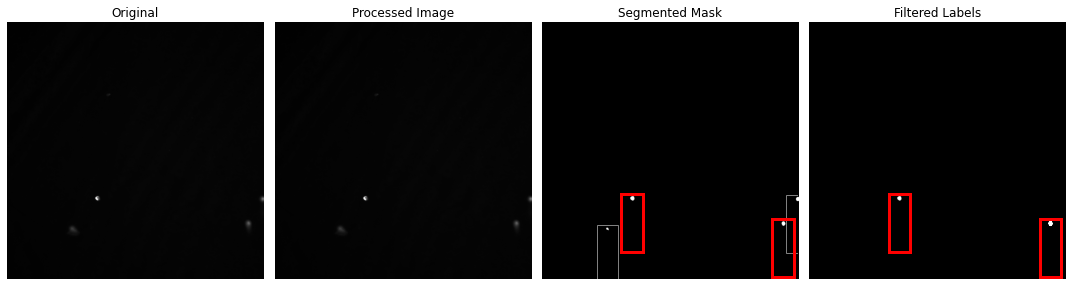

Image montage path: /Users/slam/Desktop/Example Dataset/AutoComet-Example_1_MMStack_14-Pos000_003.ome.tif


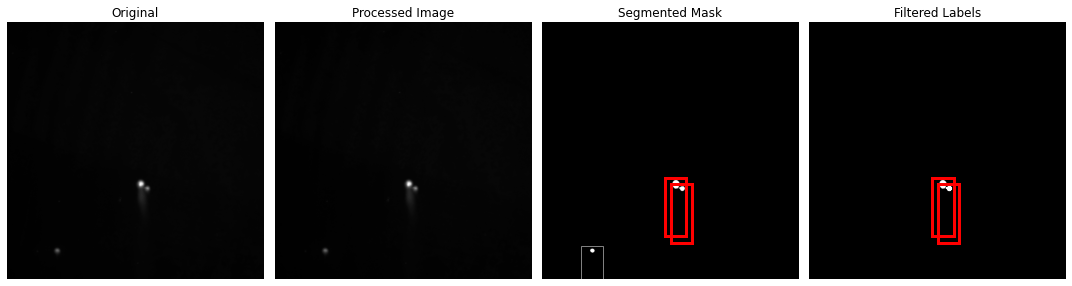

Image montage path: /Users/slam/Desktop/Example Dataset/AutoComet-Example_1_MMStack_14-Pos000_004.ome.tif


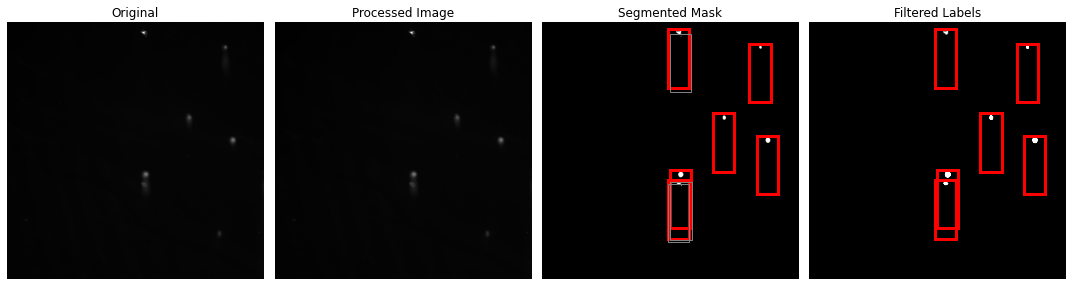

Image montage path: /Users/slam/Desktop/Example Dataset/AutoComet-Example_1_MMStack_14-Pos000_005.ome.tif


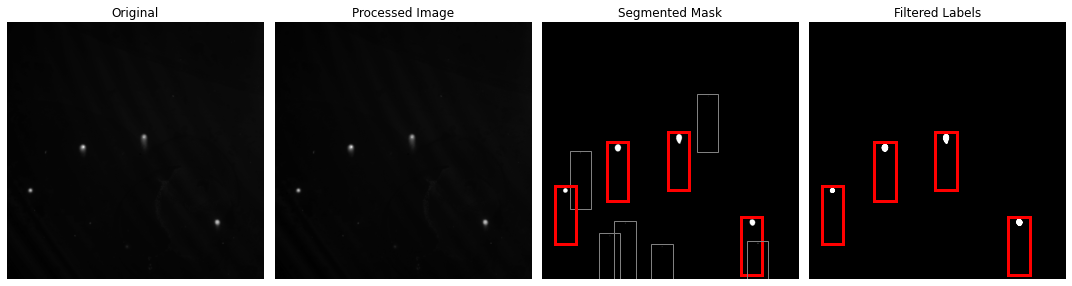

Image montage path: /Users/slam/Desktop/Example Dataset/AutoComet-Example_1_MMStack_14-Pos000_006.ome.tif


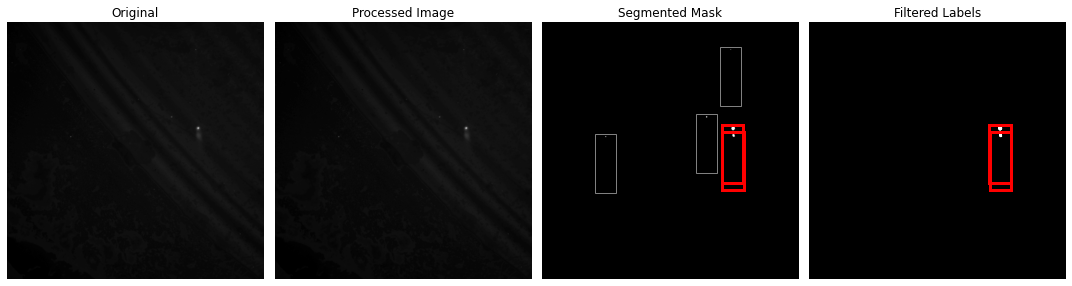

Image montage path: /Users/slam/Desktop/Example Dataset/AutoComet-Example_1_MMStack_14-Pos001_001.ome.tif


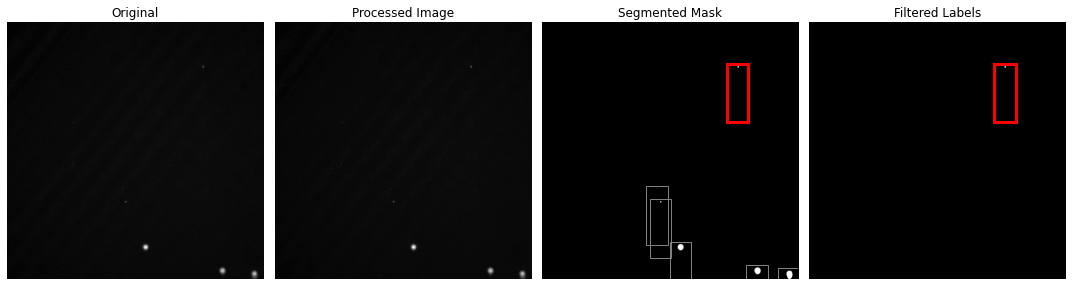

Image montage path: /Users/slam/Desktop/Example Dataset/AutoComet-Example_1_MMStack_14-Pos001_002.ome.tif


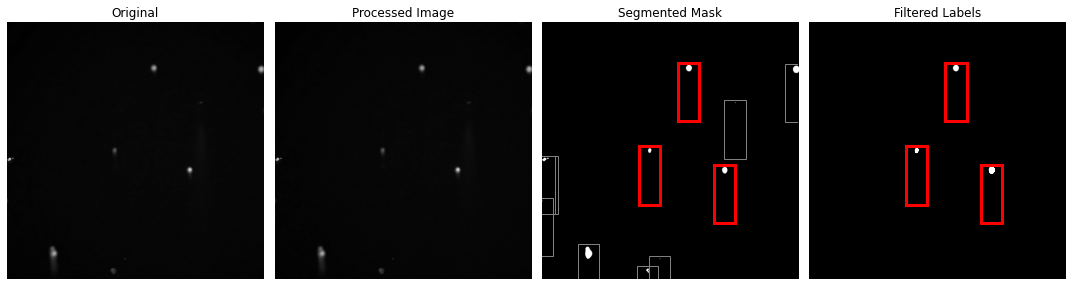

Image montage path: /Users/slam/Desktop/Example Dataset/AutoComet-Example_1_MMStack_14-Pos001_003.ome.tif


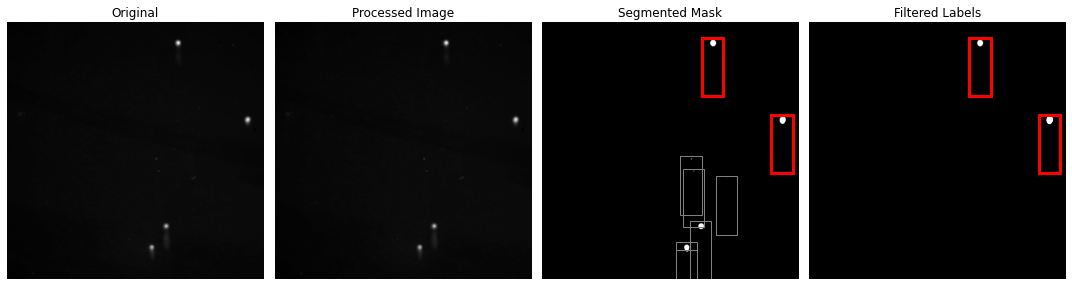

In [4]:
image_dictionary = ac.object_segment(img_filelist, 
                                     image_rotation, image_fipping,
                                     crop_dim, 
                                     min_area = 50, max_area = 10000, verbose=False)

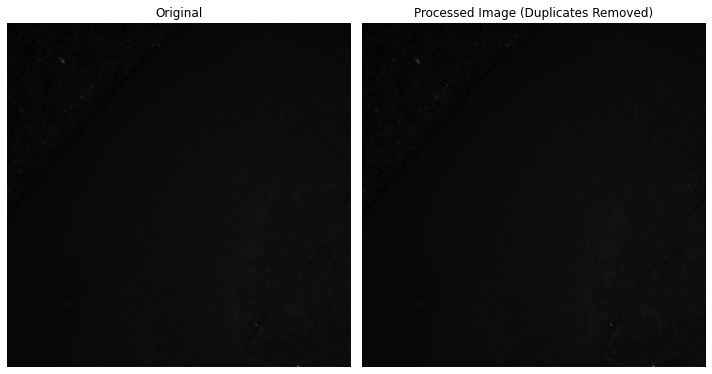

<string>:106: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?


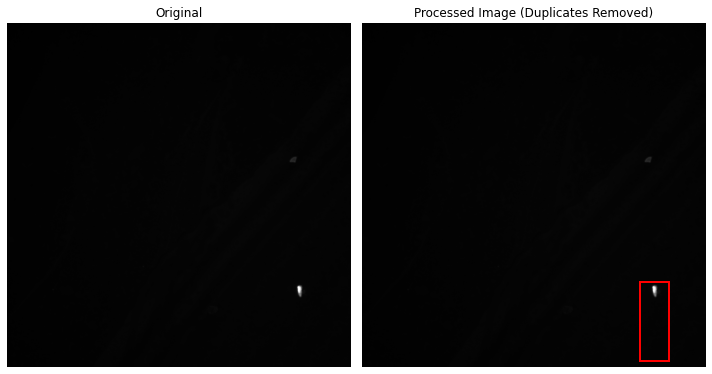

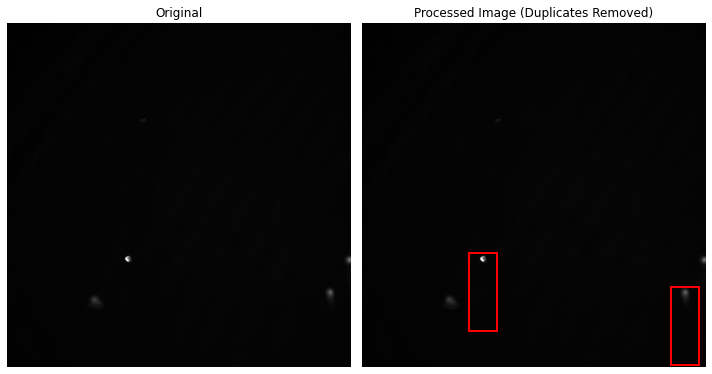

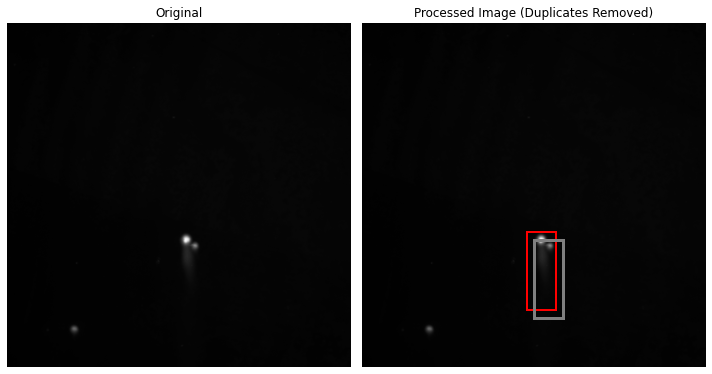

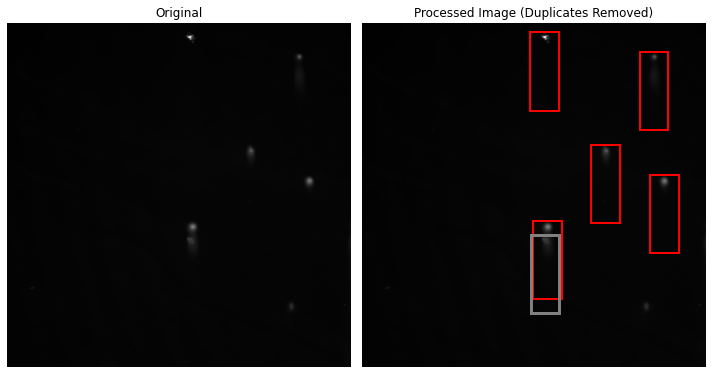

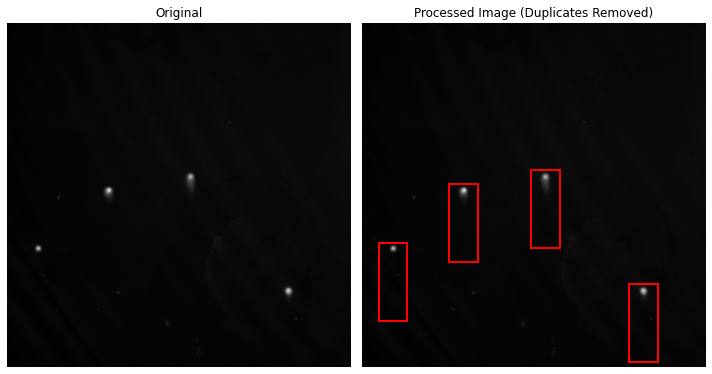

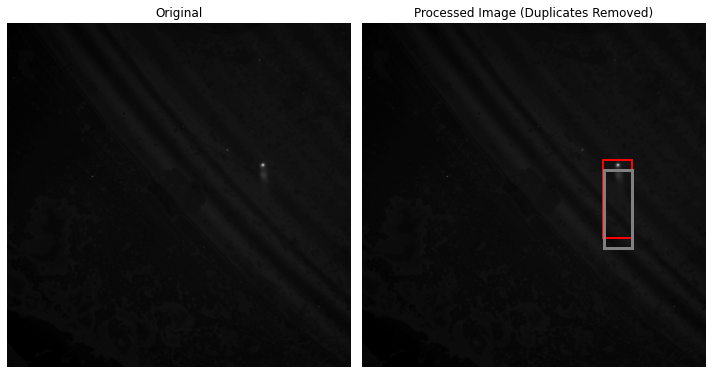

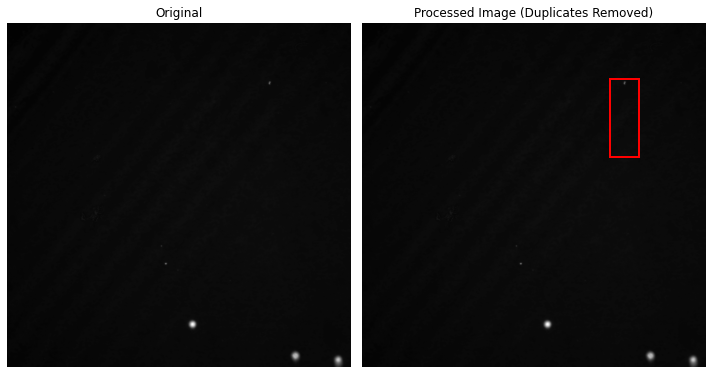

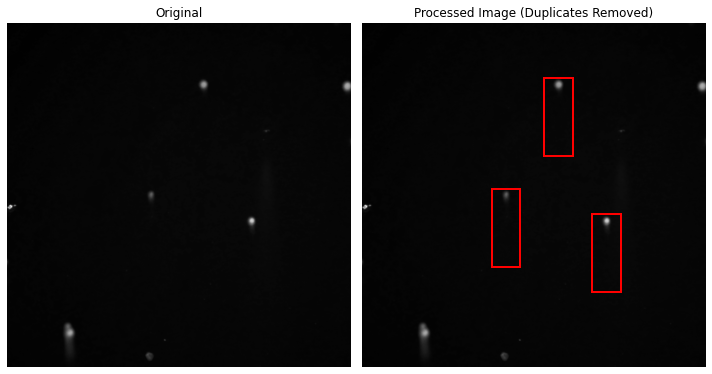

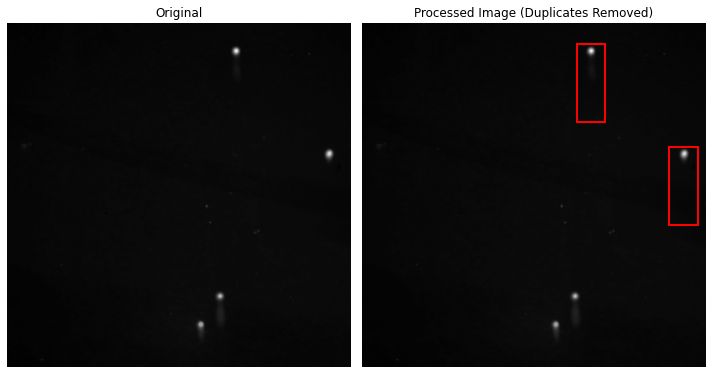

In [5]:
image_dictionary_filter = ac.filter_dup_crops(image_dictionary, crop_dim, image_rotation, image_fipping)

## Comet Measurement
- `head_min`: remove any objects in `head` label that are smaller than x pixels(default:300)
- `body_min`: remove any objects in `body` label that are smaller than x pixels(default:700)
- `head_max`: remove any objects in `head` label that are bigger than x pixels(default:2000)
- `body_max`: remove any objects in `body` label that are bigger than x pixels(default:15000)
- `body_thresh`: binary threshold value in `body` label (default:40)
- `head_thresh`: binary threshold value in `head` label (default:180)
- `head_tail_dist`: remove any body objects that are *0.5 distance lower than the head(default:0.15)
- `show_filter`: True = display filtered comets, False = do not display filtered comets
- `plot_graph`: True = display processed comets, False = do not display processed comets

<string>:102: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
<string>:103: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?


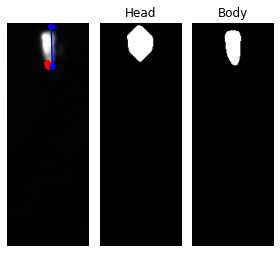

Head length:  45
Tail length:  4
Body length:  49
Comet area:  675
Comet DNA content:  103117.0
Comet average intensity:  152.76592592592593
Head area:  991
Head DNA content:  102769.0
Head average intensity:  103.70232088799193
Head DNA %:  99.66251927422249
Tail area:  -316
Tail DNA content:  348.0
Tail average intensity:  -1.1012658227848102
Tail DNA %:  0.33748072577751487
filter(negative tail_dna_percentage, protentially tiny bad debris)


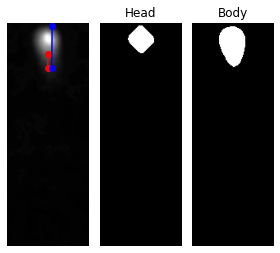

Head length:  34
Tail length:  17
Body length:  51
Comet area:  1197
Comet DNA content:  126961.0
Comet average intensity:  106.06599832915623
Head area:  689
Head DNA content:  93973.0
Head average intensity:  136.39042089985486
Head DNA %:  74.01721788580745
Tail area:  508
Tail DNA content:  32988.0
Tail average intensity:  64.93700787401575
Tail DNA %:  25.98278211419255


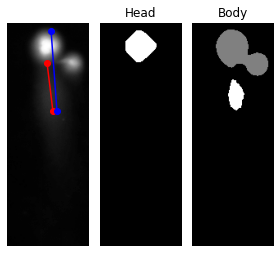

Head length:  39
Tail length:  59
Body length:  98
Comet area:  2558
Comet DNA content:  250093.0
Comet average intensity:  97.76896012509773
Head area:  999
Head DNA content:  147038.0
Head average intensity:  147.1851851851852
Head DNA %:  58.793328881656024
Tail area:  1559
Tail DNA content:  103055.0
Tail average intensity:  66.10327132777421
Tail DNA %:  41.206671118343976
filter(negative tail_dna_percentage, protentially tiny bad debris)


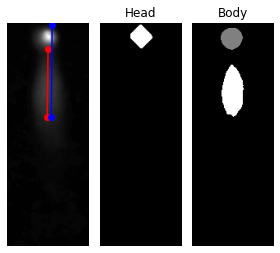

Head length:  29
Tail length:  84
Body length:  113
Comet area:  1794
Comet DNA content:  118195.0
Comet average intensity:  65.8835005574136
Head area:  469
Head DNA content:  49649.0
Head average intensity:  105.86140724946695
Head DNA %:  42.006007022293666
Tail area:  1325
Tail DNA content:  68546.0
Tail average intensity:  51.732830188679245
Tail DNA %:  57.993992977706334


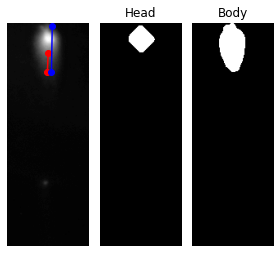

Head length:  33
Tail length:  24
Body length:  57
Comet area:  1428
Comet DNA content:  141538.0
Comet average intensity:  99.11624649859944
Head area:  659
Head DNA content:  90321.0
Head average intensity:  137.0576631259484
Head DNA %:  63.81395808899377
Tail area:  769
Tail DNA content:  51217.0
Tail average intensity:  66.60208062418725
Tail DNA %:  36.186041911006235


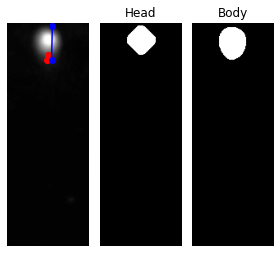

Head length:  36
Tail length:  6
Body length:  42
Comet area:  1057
Comet DNA content:  129162.0
Comet average intensity:  122.19678334910122
Head area:  850
Head DNA content:  116165.99999999999
Head average intensity:  136.66588235294117
Head DNA %:  89.93821712268313
Tail area:  207
Tail DNA content:  12996.000000000015
Tail average intensity:  62.78260869565224
Tail DNA %:  10.061782877316869


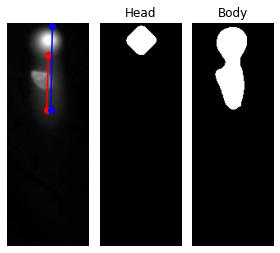

Head length:  36
Tail length:  67
Body length:  103
Comet area:  2749
Comet DNA content:  251034.0
Comet average intensity:  91.31829756275009
Head area:  856
Head DNA content:  119759.99999999999
Head average intensity:  139.90654205607476
Head DNA %:  47.70668515021869
Tail area:  1893
Tail DNA content:  131274.0
Tail average intensity:  69.34706814580032
Tail DNA %:  52.293314849781304


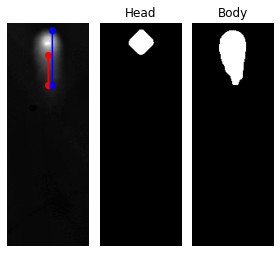

Head length:  31
Tail length:  37
Body length:  68
Comet area:  1607
Comet DNA content:  145369.0
Comet average intensity:  90.45986309894212
Head area:  604
Head DNA content:  81809.0
Head average intensity:  135.4453642384106
Head DNA %:  56.27678528434535
Tail area:  1003
Tail DNA content:  63560.0
Tail average intensity:  63.36989032901296
Tail DNA %:  43.72321471565465


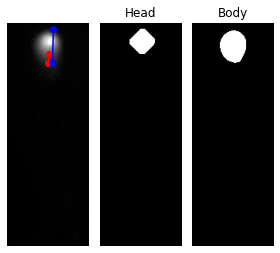

Head length:  31
Tail length:  11
Body length:  42
Comet area:  988
Comet DNA content:  105064.0
Comet average intensity:  106.34008097165992
Head area:  635
Head DNA content:  82315.99999999999
Head average intensity:  129.6314960629921
Head DNA %:  78.34843523947306
Tail area:  353
Tail DNA content:  22748.000000000015
Tail average intensity:  64.4419263456091
Tail DNA %:  21.65156476052693


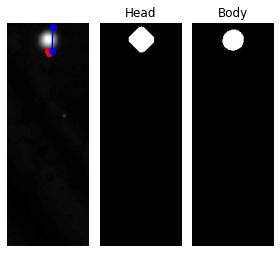

Head length:  30
Tail length:  0
Body length:  30
Comet area:  524
Comet DNA content:  65306.0
Comet average intensity:  124.62977099236642
Head area:  636
Head DNA content:  68127.0
Head average intensity:  107.11792452830188
Head DNA %:  104.31966434937065
Tail area:  -112
Tail DNA content:  -2821.0
Tail average intensity:  25.1875
Tail DNA %:  0


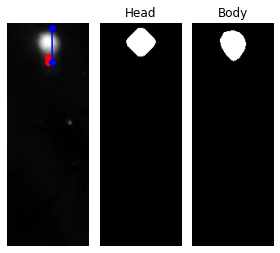

Head length:  35
Tail length:  6
Body length:  41
Comet area:  856
Comet DNA content:  108888.0
Comet average intensity:  127.20560747663552
Head area:  831
Head DNA content:  105603.0
Head average intensity:  127.07942238267148
Head DNA %:  96.98313863786643
Tail area:  25
Tail DNA content:  3285.0
Tail average intensity:  131.4
Tail DNA %:  3.0168613621335685


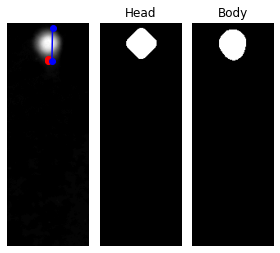

Head length:  38
Tail length:  2
Body length:  40
Comet area:  969
Comet DNA content:  127916.99999999999
Comet average intensity:  132.00928792569658
Head area:  920
Head DNA content:  124121.0
Head average intensity:  134.9141304347826
Head DNA %:  97.03245072977009
Tail area:  49
Tail DNA content:  3795.9999999999854
Tail average intensity:  77.46938775510175
Tail DNA %:  2.967549270229904


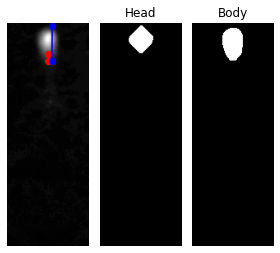

Head length:  34
Tail length:  9
Body length:  43
Comet area:  816
Comet DNA content:  92167.0
Comet average intensity:  112.94975490196079
Head area:  636
Head DNA content:  79320.0
Head average intensity:  124.71698113207547
Head DNA %:  86.06117156899975
Tail area:  180
Tail DNA content:  12847.0
Tail average intensity:  71.37222222222222
Tail DNA %:  13.93882843100025


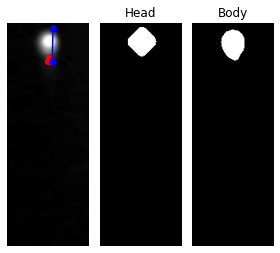

Head length:  36
Tail length:  5
Body length:  41
Comet area:  810
Comet DNA content:  103407.0
Comet average intensity:  127.66296296296296
Head area:  815
Head DNA content:  100400.0
Head average intensity:  123.19018404907976
Head DNA %:  97.09207307048845
Tail area:  -5
Tail DNA content:  3007.0
Tail average intensity:  -601.4
Tail DNA %:  2.9079269295115417


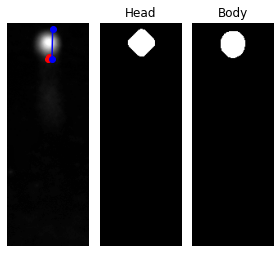

Head length:  34
Tail length:  2
Body length:  36
Comet area:  791
Comet DNA content:  96955.0
Comet average intensity:  122.57269279393174
Head area:  738
Head DNA content:  93114.0
Head average intensity:  126.17073170731707
Head DNA %:  96.03836831519777
Tail area:  53
Tail DNA content:  3841.0
Tail average intensity:  72.47169811320755
Tail DNA %:  3.9616316848022275


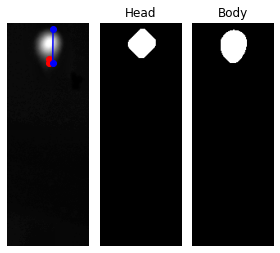

Head length:  36
Tail length:  6
Body length:  42
Comet area:  1014
Comet DNA content:  124119.0
Comet average intensity:  122.40532544378698
Head area:  814
Head DNA content:  112100.00000000001
Head average intensity:  137.71498771498773
Head DNA %:  90.31655105181319
Tail area:  200
Tail DNA content:  12018.999999999985
Tail average intensity:  60.09499999999993
Tail DNA %:  9.68344894818681


In [6]:
image_dictionary_filter, all_stats, all_img = ac.comet_measure(image_dictionary_filter, crop_dim,
                                                              head_min=20, body_min=400, 
                                                               head_max=1500, body_max=15000, 
                                                              body_thresh = 40, head_thresh= 190, 
                                                               head_tail_dist=0.3, 
                                                               show_filter = False, plot_graph=True)

## Review output images
Red = final Comets

Gray = comets being filtered from last step

- adjust the cell above if needed

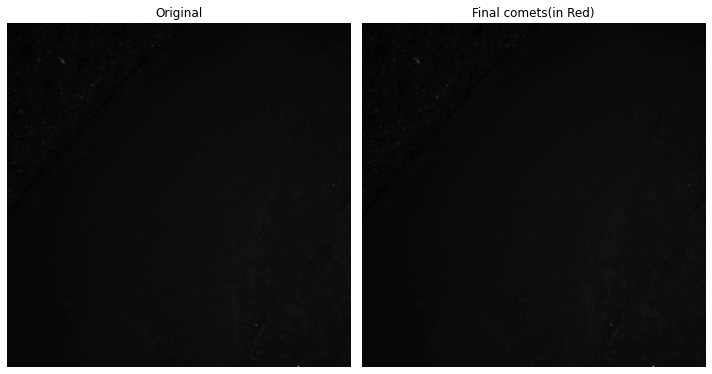

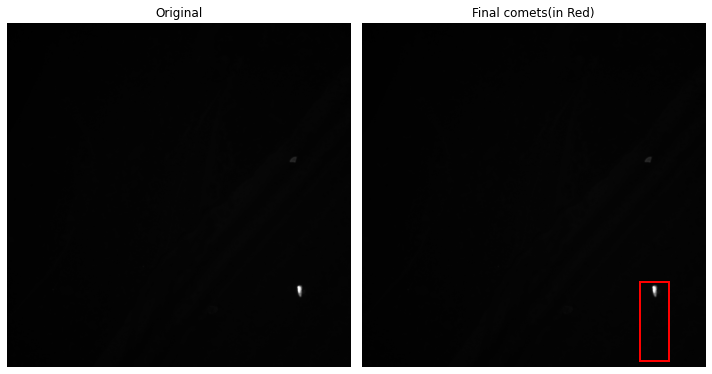

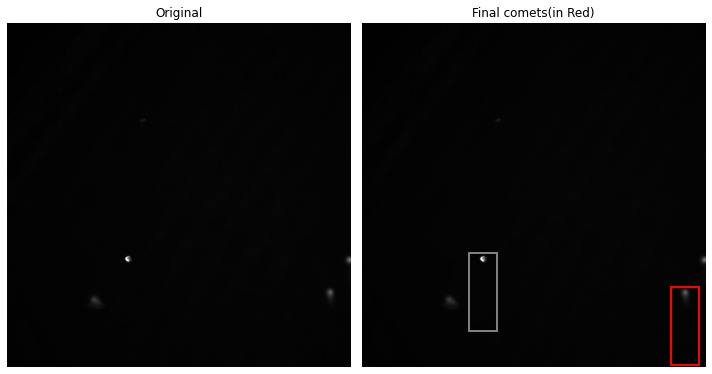

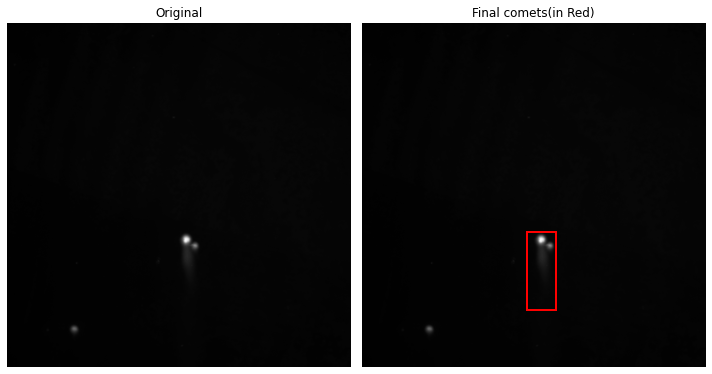

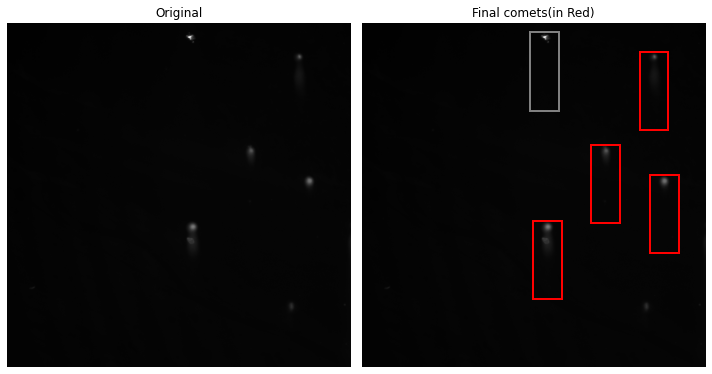

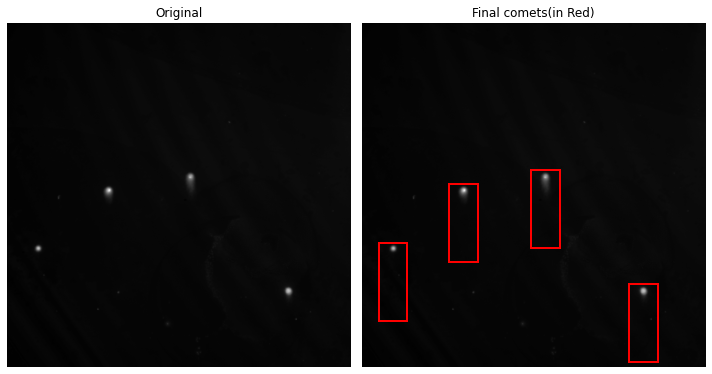

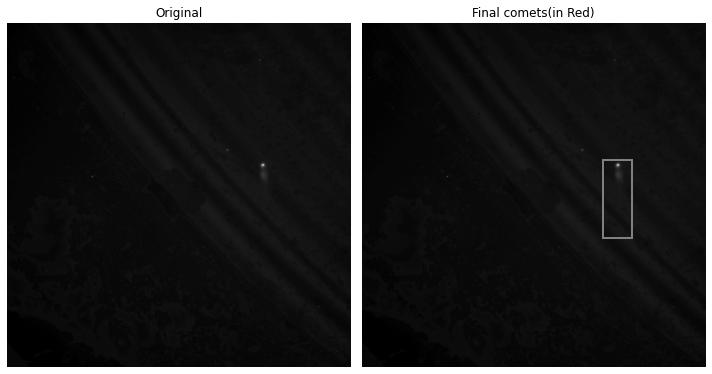

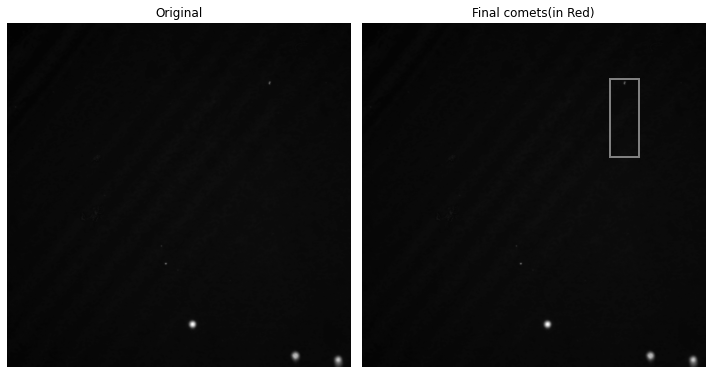

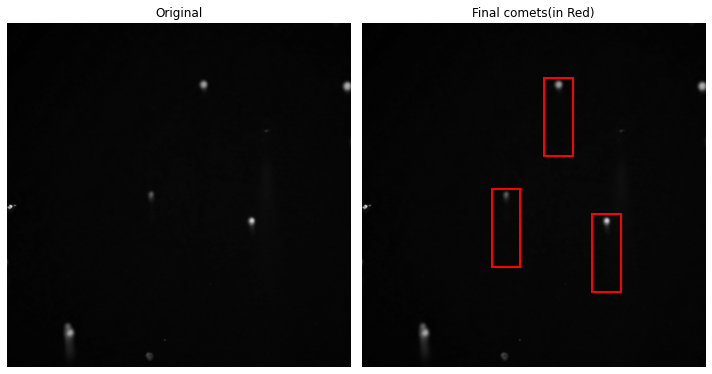

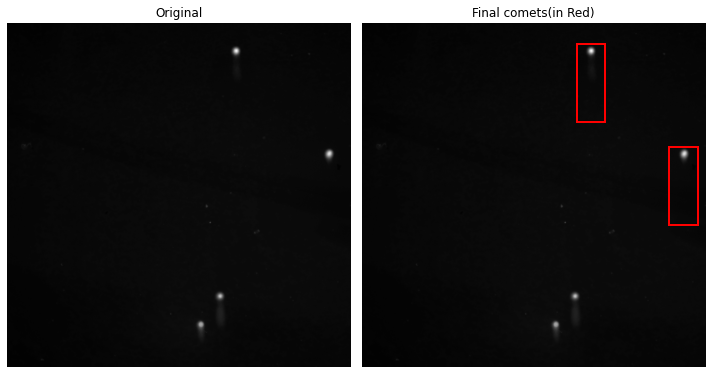

In [7]:
ac.comet_measure_montages(image_dictionary_filter, image_rotation, image_fipping, output_path)

## Final Comet Outputs

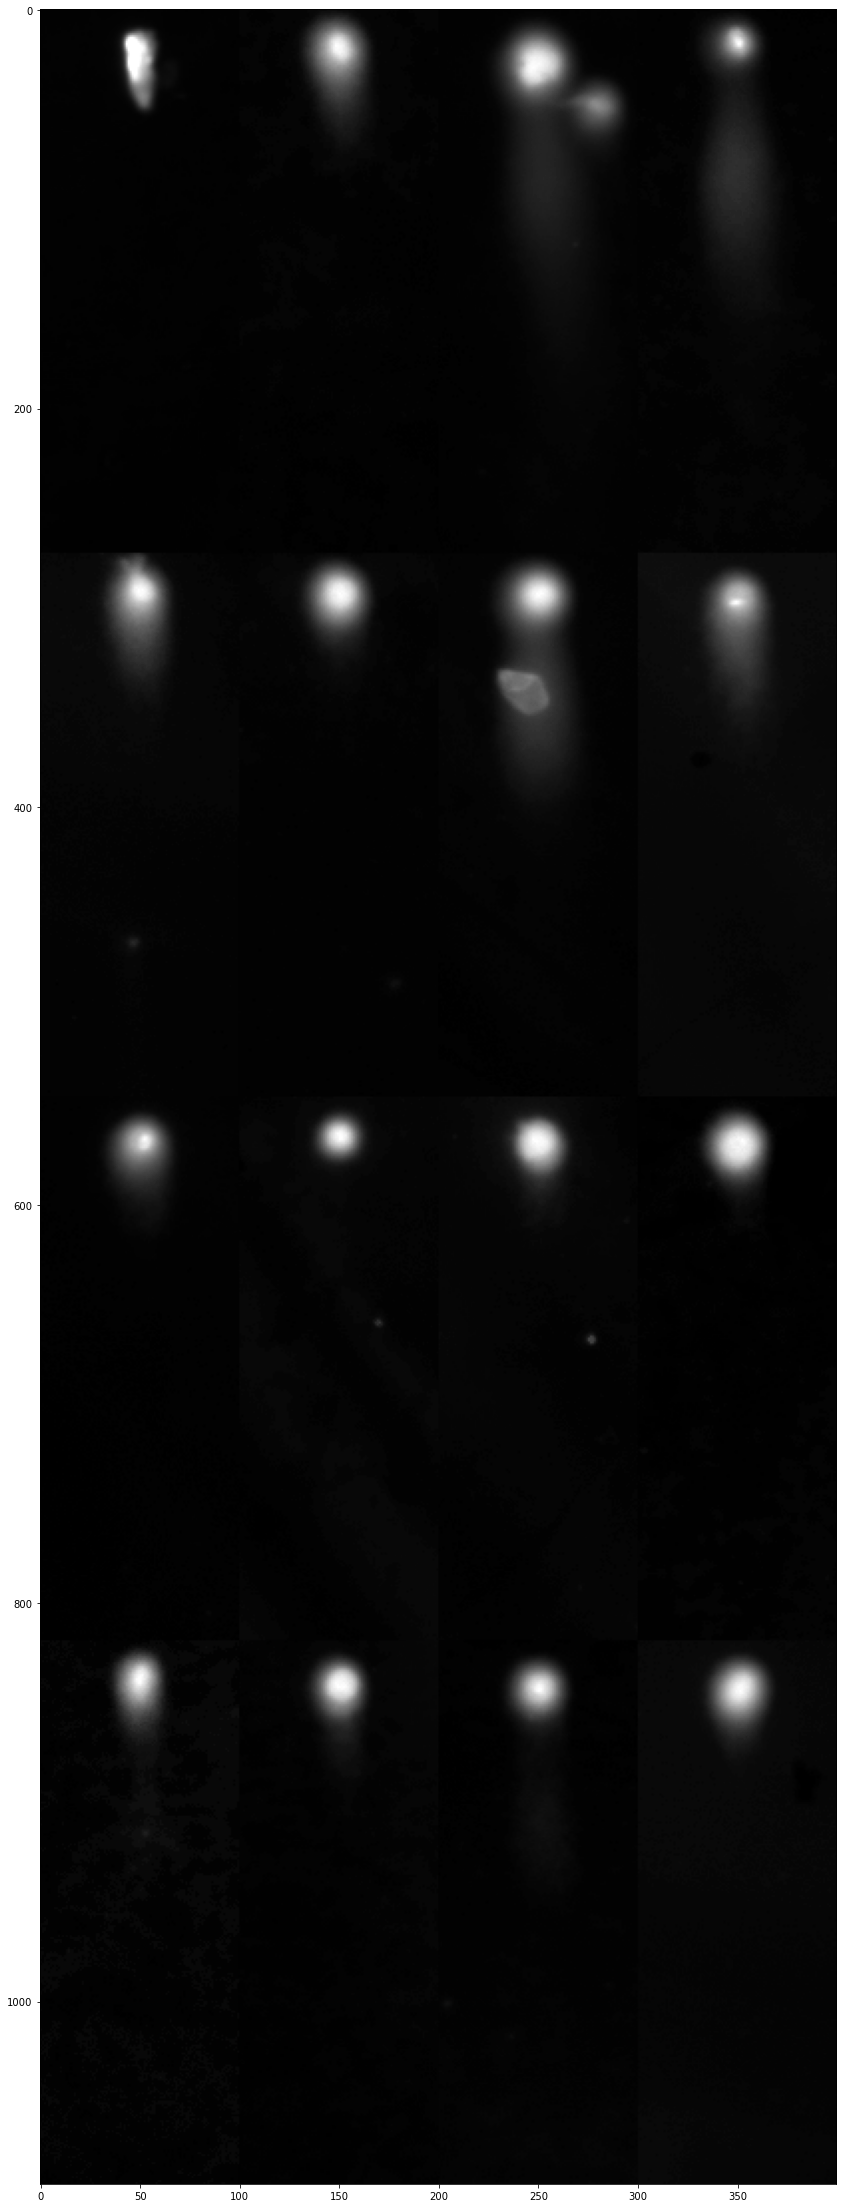

In [8]:
ac.generate_output(all_img, all_stats, output_path, image_extension)

In [9]:
print("Total comets processed: ", len(all_img))

Total comets processed:  16
